In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
log_path = Path("/home/kafka/repos/thesis/logs_rebelrig")
MACHINE = "RebelRig"
BATCH_SIZE = 128
DATASET = "cifar10"

model_name = f"resnet18_bs_{BATCH_SIZE}"

model_path_prefix = "resnet18_pretrained_pid"

# Single training
train_path = log_path / "single_runs" / DATASET

# Shared data training
train_mul_path = log_path / "queues" / DATASET / model_name

naive_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_8tw_1vw_pid"
shared_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_8tw_1vw_1pf_pid"

if DATASET == "compcars":
    # CompCars, BS 128
    pids = [
        8716, 8989, # Naive
        9453, 9728, # MPS
        10286, 10641, # Shared
        11105, 11481, # Shared + MPS
        11882, 12121, # Naive + DALI
        12466, 12691, # Shared + DALI
        15381, 15662, # Naive + DALI + MPS
        16168, 16439, # Shared + DALI + MPS
        17909, 18361, # Shared + memcpy in workers
        19614, 20058, # Shared + loader per worker + memcpy in workers
        20993, 22565, # Shared + loader per worker
        25104, 25351, # Naive, Dummy data
    ]

    trace_pids = [
        8716, 8989, # Naive
        9453, 9728, # MPS
        10244, 10598, # Shared
        11062, 11437, # Shared + MPS
        11882, 12121, # Naive + DALI
        12428, 12652, # Shared + DALI
        15381, 15662, # Naive + DALI + MPS
        16135, 16403, # Shared + DALI + MPS
        17857, 18310, # Shared + memcpy in workers
        19614, 19986, # Shared + loader per worker + memcpy in workers
        20949, 22487, # Shared + loader per worker
        25104, 25351, # Naive, Dummy data
    ]
if DATASET == "imagenet_10pct":
    pids = [
        14250, 14679, # Naive
        15304, 15745, # MPS
        16496, 16916, # Shared
        17598, 18018, # Shared + MPS
        11269, 0, # Naive DALI
            #18539, 0, # Naive DALI
        12199, 0, # Shared DALI
            #18821, 19052, # Shared DALI
    ]

    trace_pids = [
        14250, 14679, # Naive
        15304, 15745, # MPS
        16453, 16873, # Shared
        17555, 17975, # Shared + MPS
        11269, 0, # Naive DALI
            #18539, 0, # Naive DALI
        12167, 0, # Shared DALI
            #18787, 19019, # Shared DALI
    ]
if DATASET == "cifar10":
    pids = [
        13046, 13348, 13699, 14271, 1933, 3819, 5633, 0, # Naive
        14953, 15163, 23214, 16213, 9383, 10984, 12877, 0, # MPS
        16989, 17395, 17812, 18259, 16832, 17844, 19007, 0, # Shared
        18752, 19087, 19525, 20062, 21390, 22757, 0, 0, # Shared + MPS
        20713, 20869, 21087, 21381, 0, 0, 0, 0, # Naive DALI
        21822, 21974, 22182, 22453, 25264, 26145, 27200, # Shared DALI
    ]

    trace_pids = [
        13046, 13348, 13699, 14271, 1933, 3819, 5633, 0, # Naive
        14953, 15163, 23214, 16213, 9383, 10984, 12877, 0, # MPS
        16940, 17346, 17769, 18216, 16776, 17789, 18952, 0, # Shared
        18705, 19044, 19481, 20018, 21304, 22695, 0, 0, # Shared + MPS
        20713, 20869, 21087, 21381, 0, 0, 0, 0, # Naive DALI
        21789, 21941, 22149, 22420, 25215, 26100, 27160, 0  # Shared DALI
    ]

In [8]:
# BASELINE
if DATASET == "cifar10":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18", "5x RN18", "6x RN18", "7x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(0, 7)]
    naive = [df.iloc[2:]["total_time"].mean() for df in naive]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(8, 15)]
    mps = [df.iloc[2:]["total_time"].mean() for df in mps]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(16, 23)]
    shared = [df.iloc[2:]["total_time"].mean() for df in shared]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(24, 30)]
    shared_mps = [df.iloc[2:]["total_time"].mean() for df in shared_mps] + [0]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(32, 36)]
    naive_dali = [df.iloc[2:]["total_time"].mean() for df in naive_dali] + [0,0,0]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(40, 47)]
    shared_dali = [df.iloc[2:]["total_time"].mean() for df in shared_dali]
    
if DATASET == "imagenet_10pct":
    workloads = ("1x RN18", "2x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(0, 2)]
    naive = [df.iloc[2:]["total_time"].mean() for df in naive]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(2, 4)]
    mps = [df.iloc[2:]["total_time"].mean() for df in mps]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(4, 6)]
    shared = [df.iloc[2:]["total_time"].mean() for df in shared]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(6, 8)]
    shared_mps = [df.iloc[2:]["total_time"].mean() for df in shared_mps]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(8, 9)]
    naive_dali = [df.iloc[2:]["total_time"].mean() for df in naive_dali] + [0]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(10, 11)]
    shared_dali = [df.iloc[2:]["total_time"].mean() for df in shared_dali] + [0]
    


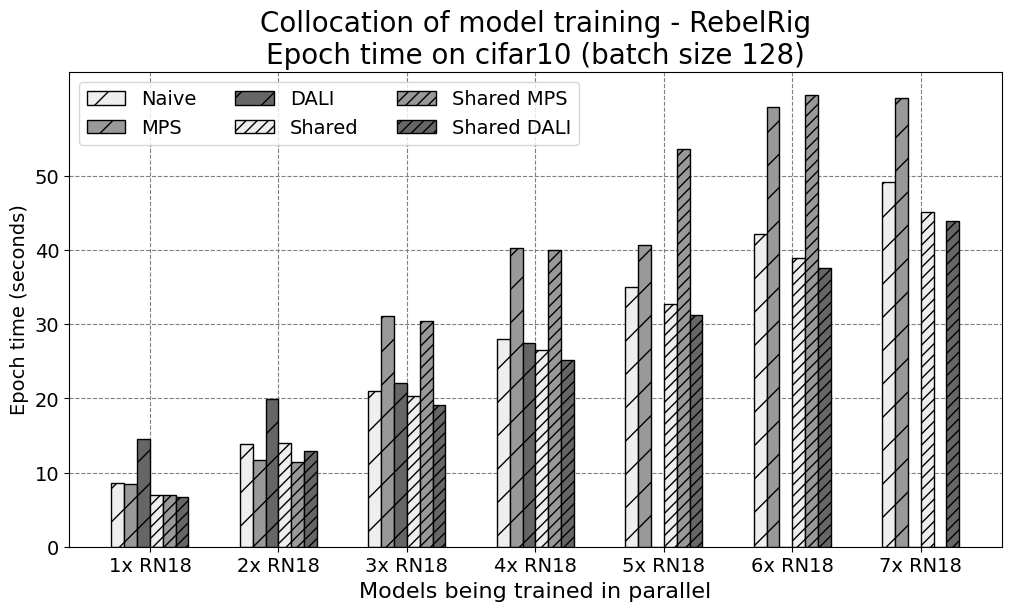

In [4]:
import matplotlib.pyplot as plt
import numpy as np

measurements ={
    "Naive": naive,
    "MPS": mps,
    "DALI": naive_dali,
    "Shared": shared,
    "Shared MPS": shared_mps,
    "Shared DALI": shared_dali,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(10,6))
hatches = ["/", "/", "/", "///", "///", "///"]
hatch_cols = ["#eeeeee", "#999999", "#666666", 
              "#eeeeee", "#999999", "#666666"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    #ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Epoch time (seconds)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nEpoch time on {DATASET} (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14, ncol=3)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 51, 10)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [5]:
def get_mem(dfs):
    mems = []
    for df in dfs:
        df["mem"] = df.apply(lambda x: x[" used_gpu_memory [MiB]"].strip(" MiB"), axis=1).astype(int)
        df = df[df[" pid"] != 12626]
        mem = df.groupby([" pid"]).max()["mem"].sum()
        mems.append(mem)
    return mems

In [6]:
if DATASET == "cifar10":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18", "5x RN18", "6x RN18", "7x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(0, 7)]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(8, 15)]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(16, 23)]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(24, 30)]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(32, 36)]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(40, 47)]
    
if DATASET == "imagenet_10pct":
    workloads = ("1x RN18", "2x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(0, 2)]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(2, 4)]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(4, 6)]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(6, 8)]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(8, 9)]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(10, 11)]

naive_mem = get_mem(naive)
mps_mem = get_mem(mps)
shared_mem = get_mem(shared)
shared_mps_mem = get_mem(shared_mps)
naive_dali_mem = get_mem(naive_dali)
shared_dali_mem = get_mem(shared_dali)

if DATASET == "cifar10":
    #shared_mem.append(0)
    shared_mps_mem.append(0)
    naive_dali_mem.extend([0,0,0])
    #shared_dali_mem.append(0)

if DATASET == "imagenet_10pct":
    naive_dali_mem.append(0)
    shared_dali_mem.append(0)



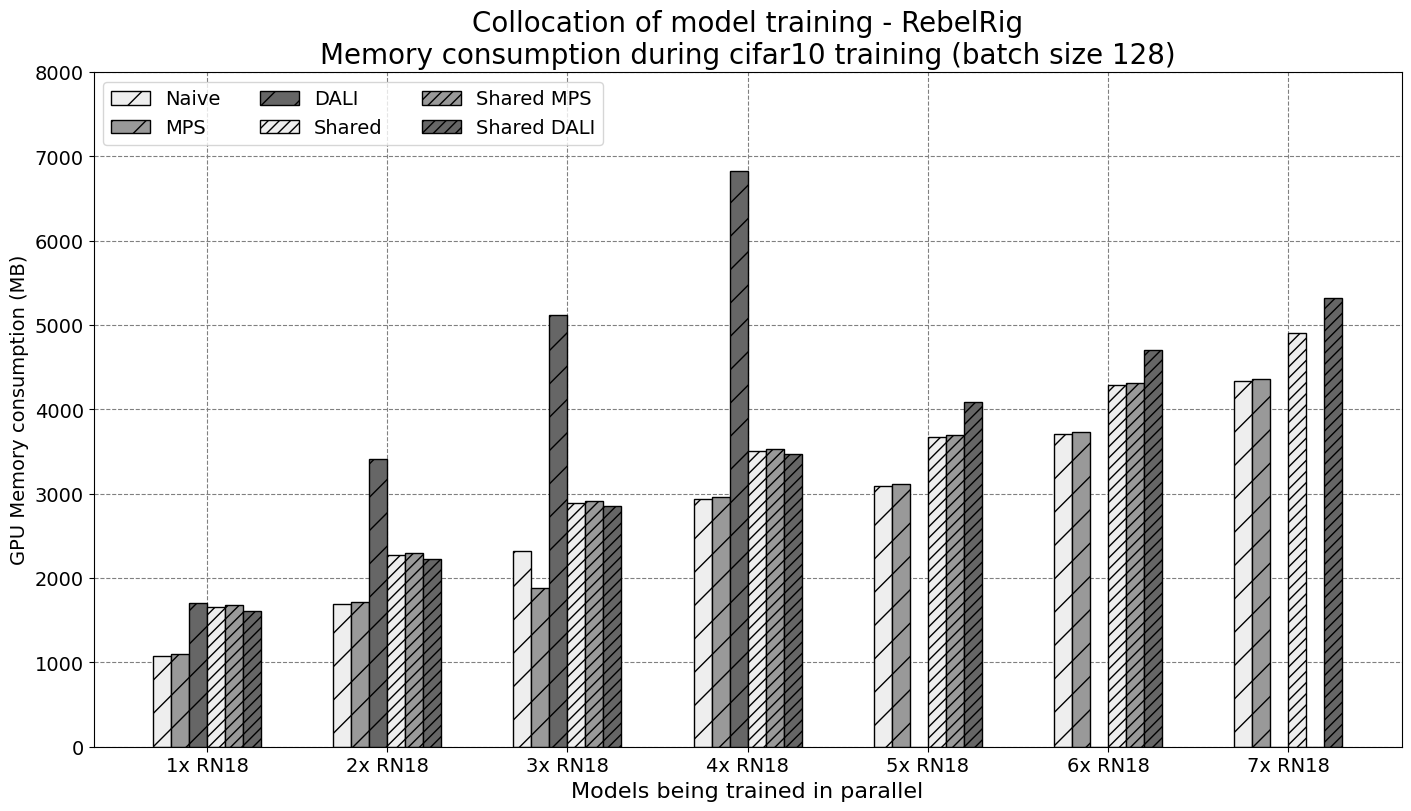

In [7]:
import matplotlib.pyplot as plt
import numpy as np

measurements ={
    "Naive": naive_mem,
    "MPS": mps_mem,
    "DALI": naive_dali_mem,
    "Shared": shared_mem,
    "Shared MPS": shared_mps_mem,
    "Shared DALI": shared_dali_mem,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(14,8))
hatches = ["/", "/", "/", "///", "///", "///"]
hatch_cols = ["#eeeeee", "#999999", "#666666", 
              "#eeeeee", "#999999", "#666666"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    #ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('GPU Memory consumption (MB)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nMemory consumption during {DATASET} training (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14, ncol=3)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 8192, 1000)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

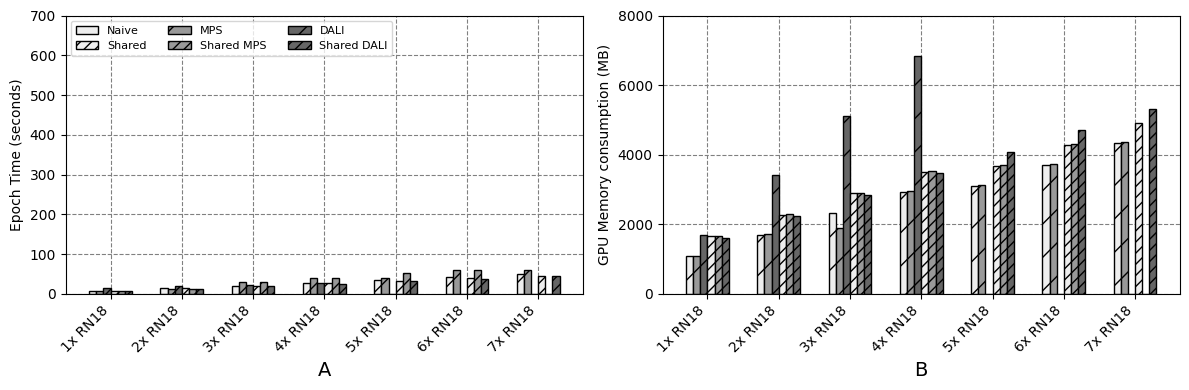

In [10]:
measurements ={
    "Naive": naive,
    "MPS": mps,
    #"DALI": naive_dali + [0,0,0,0],
    "DALI": naive_dali,
    "Shared": shared,
    "Shared MPS": shared_mps,
    "Shared DALI": shared_dali,
}

measurements_mem = {
    "Naive": naive_mem,
    "MPS": mps_mem,
    "DALI": naive_dali_mem,
    "Shared": shared_mem,
    "Shared MPS": shared_mps_mem,
    "Shared DALI": shared_dali_mem,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -1.5

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=False)
hatches = ["/", "/", "/", "///", "///", "///"]
hatch_cols = ["#eeeeee", "#999999", "#666666",
              "#eeeeee", "#999999", "#666666"]

# Plot measurements1 in the first subplot
for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    rects = ax1.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx],
                    color=hatch_cols[idx], edgecolor="black")
    multiplier += 1

# Plot measurements2 in the second subplot
for idx, (attribute, measurement) in enumerate(measurements_mem.items()):
    offset = width * multiplier
    rects = ax2.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx],
                    color=hatch_cols[idx], edgecolor="black")
    multiplier += 1

# Add labels, titles, etc. to the subplots
ax1.set_ylabel('Epoch Time (seconds)', fontsize=10)
ax2.set_ylabel('GPU Memory consumption (MB)', fontsize=10)
ax1.set_xlabel("A", fontsize=14)
ax2.set_xlabel("B", fontsize=14)

ax1.set_xticks(x + width, workloads, fontsize=10, rotation=45, ha="right")
ax2.set_xticks(x + width+0.6, workloads, fontsize=10, rotation=45, ha="right")

handles, labels = plt.gca().get_legend_handles_labels()
#order = [0,2,1,3,4,5]
order = [0,3,1,4,2,5]
ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=8, ncol=3)

ax1.set(yticks=[i for i in range(0, 701, 100)])
ax2.set(yticks=[i for i in range(0, 8192, 2000)])

for ax in [ax1, ax2]:
    ax.set_axisbelow(True)
    ax.grid(color='gray', linestyle='dashed')

plt.tight_layout()
plt.show()


In [11]:
cols = ["time", "cpu", "%usr", "%nice", "%sys", "%iowait", "%irq", "%soft", "%steal", "%guest", "%gnice", "%idle"]

def create_plottable_df(path, log_path):
    with open(path) as f:
        lines = f.readlines()
        lines = [l for l in lines if l != "\n"]
        lines = [l.strip() for l in lines if not "CPU" in l]
        lines = [l.split() for l in lines]
    df_log = pd.read_csv(log_path)
    last_time = (pd.to_datetime(df_log['timestamp'], unit="s", utc=True).dt.tz_convert('Europe/Berlin')).iloc[-1].to_datetime64()
    date = (pd.to_datetime(df_log['timestamp'], unit="s", utc=True).dt.tz_convert('Europe/Berlin')).iloc[-1].date().strftime("%Y-%m-%d ")
    new_lines = []

    for line in lines:
        new_line = []
        for idx, l in enumerate(line):
            if idx == 0:
                new_line.append(l)
            else:
                new_line.append(float(l))
        new_lines.append(new_line)
    df = pd.DataFrame(new_lines, columns=cols)
    df['time'] = date + df['time']
    df['running_seconds'] = pd.to_datetime(df['time']) - pd.DateOffset(hours=2)
    df = df[pd.to_datetime(df['running_seconds']) < last_time]

    first_timestamp = df['running_seconds'].iloc[0]
    df['running_seconds'] = (df['running_seconds'] - first_timestamp).dt.total_seconds()
    df['running_seconds_normalized'] = (df['running_seconds'] - df['running_seconds'].min()) / (df['running_seconds'].max() - df['running_seconds'].min()) * 99 + 1
    
    return df

In [12]:
def plot_dfs(dfs, title, titles, metric, normalized=True):
    xs = []
    ys = []
    fig, ax = plt.subplots(figsize=(8,4))
    width = 0.25  # the width of the bars
    multiplier = -1.5
    
        
    for idx, df in enumerate(dfs):
        #average_all_cpus = df.groupby(group)[metric].mean()
        avg = df[metric].mean()
        xs.append(idx)
        ys.append(avg)

        #plt.plot(average_all_cpus.index, average_all_cpus.values, \
        #            linewidth=1, label=titles[idx])
        #plt.hist(xs, ys, label=titles[idx])
    #return xs, ys
    ax.bar(xs, ys, width, color="#666666")
    ax.set_xticks(xs, titles, fontsize=10, rotation=45, ha="right")
    #if normalized:
    #    plt.xlabel('Running time, normalized %')
    #else:
    #    plt.xlabel('Running time (seconds)')
    if metric in ["%usr", "%nice"]:
        plt.ylabel('% CPU Utilization')
        plt.title(f'{title}\nCPU Usage')
    if metric == "%iowait":
        plt.ylabel('% I/O wait')
        plt.title(f'{title}\nI/O wait')
    #plt.legend()
    ax.set_axisbelow(True)
    ax.grid(color='gray', linestyle='dashed')
    plt.ylim(0,100)
    plt.show()

In [50]:
def set_measurements(dfs, measurements, title, metric):
    xs = []
    ys = []
    for idx, df in enumerate(dfs):
        #average_all_cpus = df.groupby(group)[metric].mean()
        avg = df[metric].mean()
        xs.append(idx)
        ys.append(avg)
        if measurements.get(title):
            measurements[title].append(avg)
        else:
            measurements[title] = [avg]
    #return xs, ys
    return measurements

In [84]:
measurements = {}
suptitles = [f"{i}x RN18" for i in range(1,8)]

naive = [train_path / model_name / f"pid_{trace_pids[i]}_cpu.out" for i in range(0, 7)]
naive_logs = [train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv" for i in range(0, 7)]
naive_dfs = [create_plottable_df(path, naive_logs[idx]) for idx, path in enumerate(naive)]

naive_mps = [train_path / model_name / f"pid_{trace_pids[i]}_cpu.out" for i in range(8, 15)]
naive_mps_logs = [train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv" for i in range(8, 15)]
naive_mps_dfs = [create_plottable_df(path, naive_mps_logs[idx]) for idx, path in enumerate(naive_mps)]


shared = [train_mul_path / f"pid_{trace_pids[i]}_cpu.out" for i in range(16, 23)]
shared_logs = [train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv" for i in range(16, 23)]
shared_dfs = [create_plottable_df(path, shared_logs[idx]) for idx, path in enumerate(shared)]

shared_mps = [train_mul_path / f"pid_{trace_pids[i]}_cpu.out" for i in range(24, 30)]
shared_mps_logs = [train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv" for i in range(24, 30)]
shared_mps_dfs = [create_plottable_df(path, shared_mps_logs[idx]) for idx, path in enumerate(shared_mps)]

naive_dali = [train_path / model_name / f"pid_{trace_pids[i]}_cpu.out" for i in range(32, 36)]
naive_dali_logs = [train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv" for i in range(32, 36)]
naive_dali_dfs = [create_plottable_df(path, naive_dali_logs[idx]) for idx, path in enumerate(naive_dali)]

shared_dali = [train_mul_path / f"pid_{trace_pids[i]}_cpu.out" for i in range(40, 47)]
shared_dali_logs = [train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv" for i in range(40, 47)]
shared_dali_dfs = [create_plottable_df(path, shared_dali_logs[idx]) for idx, path in enumerate(shared_dali)]

measurements = set_measurements(naive_dfs, measurements, "Naive", "%usr")
measurements = set_measurements(naive_mps_dfs, measurements, "MPS", "%usr")
measurements = set_measurements(naive_dali_dfs, measurements, "DALI", "%usr")
measurements = set_measurements(shared_dfs, measurements, "Shared", "%usr")
measurements = set_measurements(shared_mps_dfs, measurements, "Shared MPS", "%usr")
measurements = set_measurements(shared_dali_dfs, measurements, "Shared DALI", "%usr")

measurements["DALI"] += [0,0,0]
measurements["Shared MPS"] += [0]

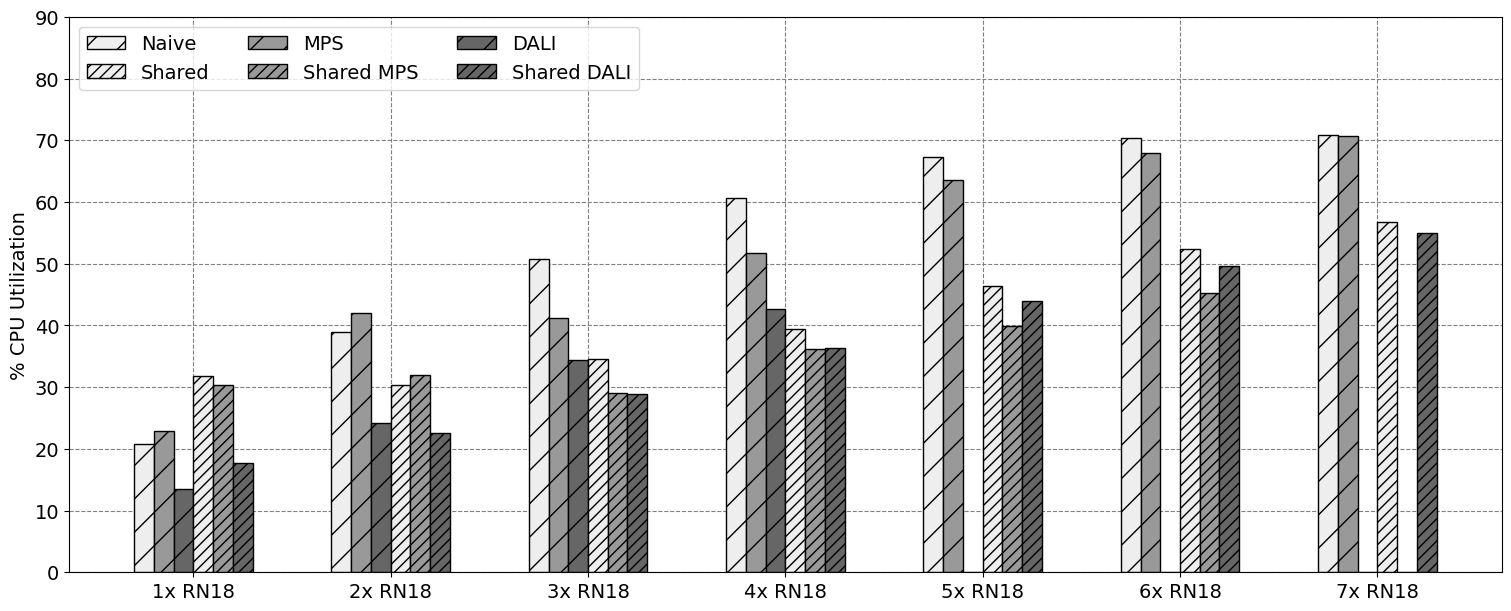

In [85]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(suptitles))  # the label locations
width = 0.1  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,6))
hatches = ["/", "/", "/", "///", "///", "///"]
hatch_cols = ["#eeeeee", "#999999", "#666666",
              "#eeeeee", "#999999", "#666666"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    #ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% CPU Utilization', fontsize=14)
#ax.set_title(f'Collocation of model training - {MACHINE}\nMemory consumption during {DATASET} training (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, suptitles, fontsize=14)
#ax.legend(loc='upper left', fontsize=14, ncol=3)
handles, labels = plt.gca().get_legend_handles_labels()
#order = [0,2,1,3,4,5]
order = [0,3,1,4,2,5]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=14, ncol=3)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 100, 10)], fontsize=14)
#plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

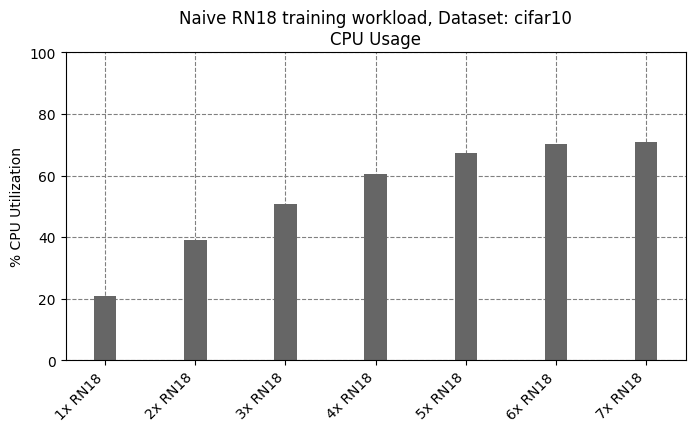

In [20]:
naive = [train_path / model_name / f"pid_{trace_pids[i]}_cpu.out" for i in range(0, 7)]
naive_logs = [train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv" for i in range(0, 7)]

naive_suptitles = [f"{i}x RN18" for i in range(1,8)]

title = f"Naive RN18 training workload, Dataset: {DATASET}"

dfs = [create_plottable_df(path, naive_logs[idx]) for idx, path in enumerate(naive)]

plot_dfs(dfs, title, naive_suptitles, "%usr", True)

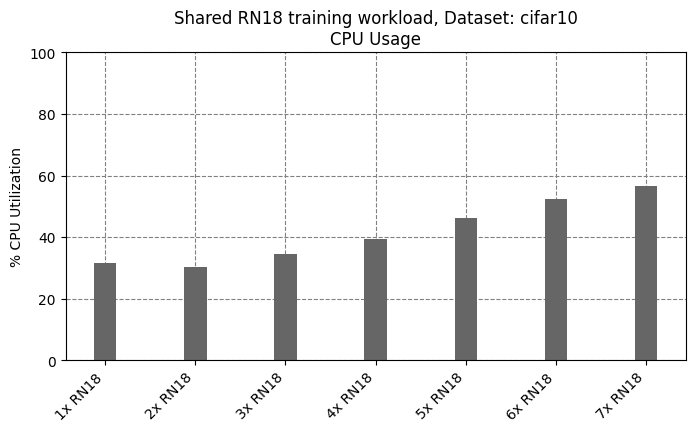

In [21]:
shared = [train_mul_path / f"pid_{trace_pids[i]}_cpu.out" for i in range(16, 23)]
shared_logs = [train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv" for i in range(16, 23)]

shared_suptitles = [f"{i}x RN18" for i in range(1,8)]

title = f"Shared RN18 training workload, Dataset: {DATASET}"

dfs = [create_plottable_df(path, shared_logs[idx]) for idx, path in enumerate(shared)]

plot_dfs(dfs, title, shared_suptitles, "%usr", True)

In [104]:
trace_header = ["date", "time", "gpu", "pid", "type", "sm", "mem", "enc", "dec", "mb", "command"]

def get_sm_mean(path, mps=False):
    workload_type = ""

    with open(path, "r") as f:
        next(f)
        next(f)
        lines = f.readlines()
        lines = [line.strip().split() for line in lines]

    clean_lines = []

    for l in lines:
        if l == ['#Date', 'Time', 'gpu', 'pid', 'type', 'sm', 'mem', 'enc', 'dec', 'fb', 'command']:
            continue
        elif l == ['#YYYYMMDD', 'HH:MM:SS', 'Idx', '#', 'C/G', '%', '%', '%', '%', 'MB', 'name']:
            continue
        elif l[-1] != "nvidia-cuda-mps" and "mps" in workload_type:
            continue
        elif int(l[2]) != 0:
            continue
        elif l[3] == "-":
            continue
        else:
            clean_lines.append(l)

    df = pd.DataFrame(clean_lines, columns=trace_header)

    df["sm"] = df["sm"].replace({"-": 0})
    df["mem"] = df["mem"].replace({"-": 0})

    df['sm'] = df['sm'].astype(int)
    df['mem'] = df['mem'].astype(int)
    if mps:
        df = df[df["command"] == "nvidia-cuda-mps"]
    df = df[df["sm"] > 0]

    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
    #return df
    return df.groupby("time")["sm"].sum().mean()

In [107]:
if DATASET == "cifar10":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18", "5x RN18", "6x RN18", "7x RN18")

    naive = [get_sm_mean(train_path / model_name / f"pid_{trace_pids[i]}_gpu.out") for i in range(0, 7)]

    mps = [get_sm_mean(train_path / model_name / f"pid_{trace_pids[i]}_gpu.out", mps=True) for i in range(8, 15)]

    shared = [get_sm_mean(train_mul_path / f"pid_{trace_pids[i]}_gpu.out") for i in range(16, 23)]

    shared_mps = [get_sm_mean(train_mul_path / f"pid_{trace_pids[i]}_gpu.out", mps=True) for i in range(24, 30)] + [0]

    naive_dali = [get_sm_mean(train_path / model_name / f"pid_{trace_pids[i]}_gpu.out") for i in range(32, 36)] + [0,0,0]

    shared_dali = [get_sm_mean(train_mul_path / f"pid_{trace_pids[i]}_gpu.out") for i in range(40, 47)]
if DATASET == "imagenet_10pct":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18")

    naive = [get_sm_mean(train_path / model_name / f"pid_{trace_pids[i]}_gpu.out") for i in range(0, 4)]

    mps = [get_sm_mean(train_path / model_name / f"pid_{trace_pids[i]}_gpu.out", mps=True) for i in range(4, 8)]

    shared = [get_sm_mean(train_mul_path / f"pid_{trace_pids[i]}_gpu.out") for i in range(8, 12)]

    shared_mps = [get_sm_mean(train_mul_path / f"pid_{trace_pids[i]}_gpu.out", mps=True) for i in range(12, 16)]

    naive_dali = [get_sm_mean(train_path / model_name / f"pid_{trace_pids[i]}_gpu.out") for i in range(16, 20)]

    shared_dali = [get_sm_mean(train_mul_path / f"pid_{trace_pids[i]}_gpu.out") for i in range(20, 24)]

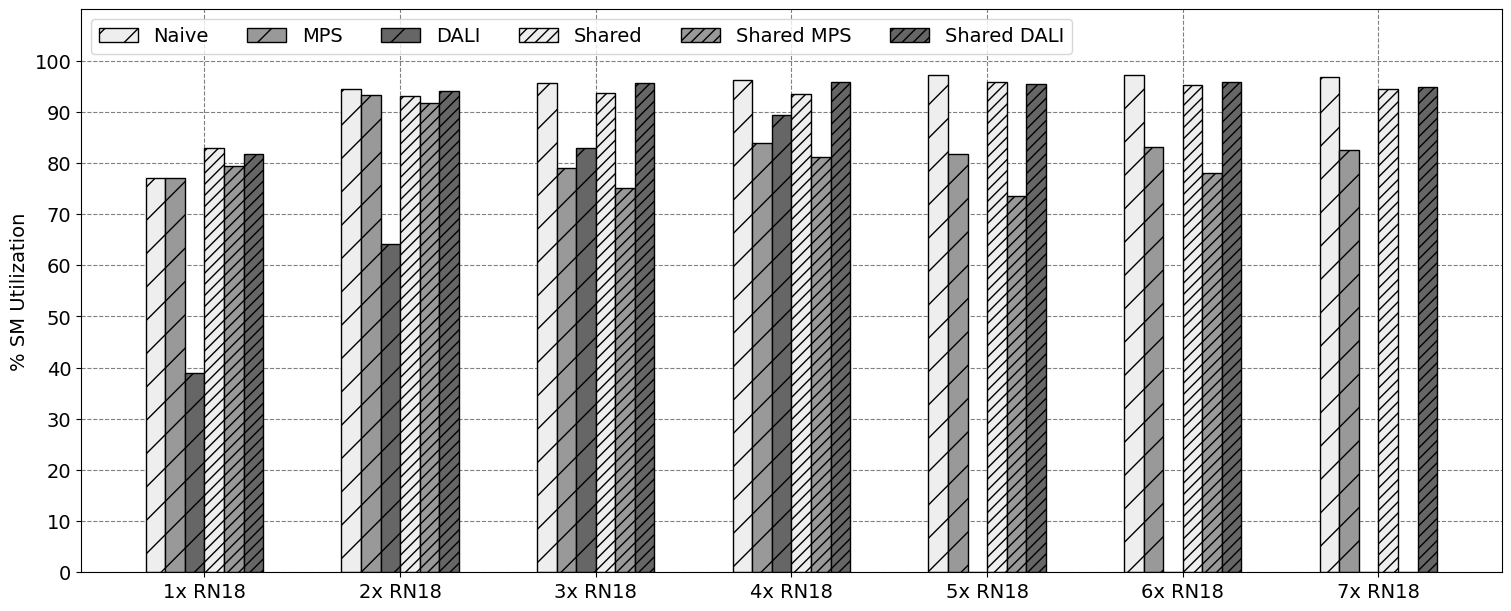

In [111]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

measurements ={
    "Naive": naive,
    "MPS": mps,
    "DALI": naive_dali,
    "Shared": shared,
    "Shared MPS": shared_mps,
    "Shared DALI": shared_dali,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,6))
hatches = ["/", "/", "/", "///", "///", "///"]
hatch_cols = ["#eeeeee", "#999999", "#666666", 
              "#eeeeee", "#999999", "#666666"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    #ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% SM Utilization', fontsize=14)
#ax.set_title(f'Collocation of model training - {MACHINE}\nSM %-utilization during {DATASET} training (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14, ncols=6)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 101, 10)], fontsize=14)
#fmt = lambda x, pos: '{:.0f}%'.format(x*100)
#ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
plt.ylim(0, 110)
#plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()